# Products

## Imports

In [1]:
import pandas as pd
products_url = "https://raw.githubusercontent.com/MerleSt/Eniac/main/Data-Eniac/products.csv"
products_df = pd.read_csv(products_url)
products = products_df.copy()
products

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


## Drop Duplicates

In [2]:
products.duplicated().sum()

8746

In [3]:
products.drop_duplicates(inplace=True)
products.duplicated().sum()

0

## Missing Values

In [4]:
products.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

### Desc

In [5]:
(f"7 missing values represents {((products.desc.isna().sum() / products.shape[0])*100).round(5)}% of the rows in our DataFrame")

'7 missing values represents 0.06616% of the rows in our DataFrame'

In [6]:
products.desc.isna().value_counts(normalize=True)

False    0.999338
True     0.000662
Name: desc, dtype: float64

Let's replace the missing description with the name since it is long enough.

In [7]:
products.loc[products['desc'].isna(), 'desc'] = products.loc[products['desc'].isna(), 'name']
products.isna().sum()

sku             0
name            0
desc            0
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

### Price

In [8]:
(f"{products.price.isna().sum()} missing values represents {((products.price.isna().sum() / products.shape[0])*100).round(5)}% of the rows in our DataFrame")

'46 missing values represents 0.43478% of the rows in our DataFrame'

In [9]:
products.price.isna().value_counts(normalize=True)

False    0.995652
True     0.004348
Name: price, dtype: float64

In [10]:
products = products.loc[~products.price.isna(), :]
products.isna().sum()

sku             0
name            0
desc            0
price           0
promo_price     0
in_stock        0
type           50
dtype: int64

### Type

In [11]:
(f"{products.type.isna().sum()} missing values represents {((products.type.isna().sum() / products.shape[0])*100).round(5)}% of the rows in our DataFrame")

'50 missing values represents 0.47465% of the rows in our DataFrame'

In [12]:
products.type.isna().value_counts(normalize=True)

False    0.995253
True     0.004747
Name: type, dtype: float64

In [13]:
products = products.loc[~products.type.isna(), :]
products.isna().sum()

sku            0
name           0
desc           0
price          0
promo_price    0
in_stock       0
type           0
dtype: int64

## Datatypes & Format

In [14]:
products.dtypes

sku            object
name           object
desc           object
price          object
promo_price    object
in_stock        int64
type           object
dtype: object

In [15]:
products['in_stock'] = products['in_stock'].astype(bool)

In [16]:
products['type'] = products['type'].astype('category')

### Price

In [17]:
price_problems_number = products.loc[(products.price.astype(str).str.contains("\d+\.\d+\.\d+"))|(products.price.astype(str).str.contains("\d+\.\d{3,}")), :].shape[0]
price_problems_number

538

In [18]:
print(f"The column price has in total {price_problems_number} wrong values. This is {round(((price_problems_number / products.shape[0]) * 100), 2)}% of the rows of the DataFrame")

The column price has in total 538 wrong values. This is 5.13% of the rows of the DataFrame


5.15% is a reasonable amount of our data. However, the price column will be important to understanding discounts, so I'd like it to be very trustworthy as we are basing business decisions on it. Therefore, we'll delete these rows

In [19]:
products = products.loc[(~products.price.astype(str).str.contains("\d+\.\d+\.\d+"))&(~products.price.astype(str).str.contains("\d+\.\d{3,}")), :]
products

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,True,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,False,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,False,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,False,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,True,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,True,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,True,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,True,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,False,1392


In [20]:
products['price'] = pd.to_numeric(products['price'])
products.loc[:,'price'] = products['price'].round(2)

In [21]:
products.dtypes

sku              object
name             object
desc             object
price           float64
promo_price      object
in_stock           bool
type           category
dtype: object

### Promo Price

Format price, into r'/d+/./d{2}

In [22]:
# # Count the number of digits before the decimal in the 'price' column
# products['price_pre_decimal_count'] = products['price'].apply(lambda x: len(str(int(x))))
# products.head(50)

In [23]:
# def count_digits_before_last_dot(s):
#     parts = s.split('.')
#     if len(parts) > 1:
#         # Join all parts except the last one, then count the digits
#         return len(''.join(parts[:-1]))
#     else:
#         return len(parts[0])

# products['promo_price_pre_decimal_count'] = products['promo_price'].apply(count_digits_before_last_dot)
# products.tail(50)
# # products.loc[products['promo_price_pre_decimal_count']==6]

In [24]:
# def correct_promo_price(row):
#     # Check if there are two dots in promo_price
#     if row['promo_price'].count('.') == 2:
#         # If both counts are equal, drop the first dot
#         if row['price_pre_decimal_count'] == row['promo_price_pre_decimal_count']:
#             corrected = row['promo_price'].replace('.', '', 1)  # replace the first dot occurrence only
#             return corrected
    
#     # Your original condition
#     if row['price_pre_decimal_count'] != row['promo_price_pre_decimal_count']:
#         corrected = row['promo_price'].replace('.', '')
#         split_index = row['price_pre_decimal_count']
#         corrected = corrected[:split_index] + '.' + corrected[split_index:]
#         return corrected
    
#     return row['promo_price']

# products['promo_price'] = products.apply(lambda row: correct_promo_price(row), axis=1)

# # Print rows where price is greater than 1000
# products.loc[products['price'] > 1000]

In [25]:
products.promo_price.str.contains("\d+\.\d+\.\d+").value_counts()

False    5674
True     4272
Name: promo_price, dtype: int64

In [26]:
# # Convert to float and round
# products['promo_price'] = products['promo_price'].astype(float).round(2)
# products

In [27]:
# for index, row in products.iterrows():
#     if row['promo_price'] > row['price']:
#         products.at[index, 'promo_price'] = row['promo_price'] / 10

# # Print rows where price is greater than 1000
# products.loc[products['price'] > 1000]


price =1000.99 promo_price = 9.999.999 -> promo_price = 9999.99 - 999.99

In [28]:
# products['promo_percentage'] = (1-(products['promo_price']/products['price'])).round(4)
# products

In [29]:
# products.loc[products['promo_percentage'] > 0.4].count()

#### Drop Promo_price column

In [30]:
products.drop(columns={'promo_price'}, inplace=True)
products

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,True,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,False,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,False,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,False,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,True,1364
...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,True,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,True,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,True,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,False,1392


## Outliers for numerical data: 

### Price

In [31]:
products.dtypes

sku           object
name          object
desc          object
price        float64
in_stock        bool
type        category
dtype: object

price, promo_price - use boxplots

In [32]:
import matplotlib.pyplot as plt

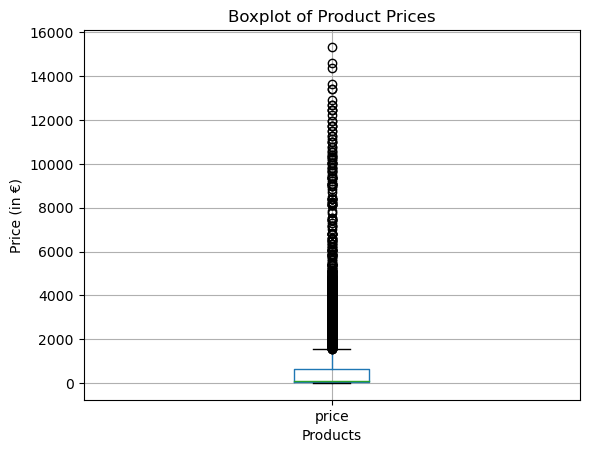

In [33]:
products.boxplot(column='price')
# Set title and labels for clarity
plt.title('Boxplot of Product Prices')
plt.ylabel('Price (in €)')
plt.xlabel('Products')

# Show the plot
plt.show()

In [34]:
# Outliers
Q1 = products['price'].quantile(0.25)
Q3 = products['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = products[(products['price'] < lower_bound) | (products['price'] > upper_bound)]
outliers

,sku,name,desc,price,in_stock,type
109,PAC0508,Apple MacBook Pro 133 '' 25GHz | 16GB RAM | 1T...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1919.00,False,1282
118,PAC0507,Apple MacBook Pro 133 '' 25Ghz | 16GB RAM | Fu...,Apple MacBook Pro Fusion Drive 16GB 2 internal...,1639.00,False,1282
127,PAC0515,"Apple MacBook Pro 133 ""i7 29GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) and ...,2039.00,False,1282
136,PAC0510,"Apple MacBook Pro 133 ""i7 29GHz | RAM 16GB | 7...",Apple MacBook Pro Fusion Drive 16GB 2 internal...,2039.00,False,1282
145,PAC0185,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 2...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1639.00,False,1282
...,...,...,...,...,...,...
19112,AP20449,"Like new - Apple Macbook Retina 12 ""Core m5 12...",Retina Display MacBook 12-inch revised and rea...,1799.00,False,"5,39E+11"
19194,DLL0053,"Dell UltraSharp UP2718Q Monitor 27 ""4K HDR",Monitor 27 inch 4K 4K and 6ms response height ...,1869.99,False,1296
19197,PAC2510,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 16GB...",27-inch iMac 5K Retina refitted with 16GB of R...,2869.00,False,"5,74E+15"
19198,AP20461,"Apple MacBook Pro 15 ""Core i7 Touch Bar 26GHz ...",Refurbished MacBook Pro and 15-inch Apple cert...,2699.00,True,"1,02E+12"


I conclude that there are no outliers in the price since apple products are much more expensive than computer accessories. No values will be dropped.

In [35]:
products.loc[products['price']<=0]

,sku,name,desc,price,in_stock,type


Also no negative prices.

I will not drop the outliers since I will have to work with extreme promotional values as the business question is related to it. However, I might come back to this and work on these values.

## Drop columns not needed in export

In [36]:
# products.drop('price_pre_decimal_count', axis=1, inplace=True)
# products.drop('promo_price_pre_decimal_count', axis=1, inplace=True)
# products

# Export

In [37]:
products.to_csv('/Users/merlesteffen/Documents/GitHub/Eniac/Data-Eniac/Data_Cleaned/products_clean.csv', index=False)
products.to_parquet('/Users/merlesteffen/Documents/GitHub/Eniac/Data-Eniac/Data_Cleaned/products_clean.parquet', index=False)